Importing the various libraries like Keras,open cv,os,tqdm and pandas

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization,ZeroPadding2D
import cv2
import numpy as np
import os
from tqdm import tqdm
import glob
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Downloading the dataset using wget

In [ ]:
!wget https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Training_Images.zip

--2021-03-26 08:33:10--  https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Training_Images.zip
Resolving sid.erda.dk (sid.erda.dk)... 130.225.104.13
Connecting to sid.erda.dk (sid.erda.dk)|130.225.104.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 276294756 (263M) [application/zip]
Saving to: ‘GTSRB_Final_Training_Images.zip’

GTSRB_Final_Trainin 100%[===================>] 263.50M  19.2MB/s    in 15s     

2021-03-26 08:33:25 (17.5 MB/s) - ‘GTSRB_Final_Training_Images.zip’ saved [276294756/276294756]



In [ ]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [ ]:
import os
import zipfile

In [ ]:
!cp '/content/GTSRB_Final_Training_Images.zip' '/content/' 
!mkdir 'images'

cp: '/content/GTSRB_Final_Training_Images.zip' and '/content/GTSRB_Final_Training_Images.zip' are the same file


In [ ]:
file='GTSRB_Final_Training_Images.zip'
zip_file=zipfile.ZipFile(file,'r')
zip_file.extractall('/content/images')
zip_file.close()

In [ ]:
!nvidia-smi

Fri Mar 26 08:33:34 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
def load_data(data_dir):
    """Loads a data set and returns two lists:
    
    images: a list of Numpy arrays, each representing an image.
    labels: a list of numbers that represent the images labels.
    """
    # Get all subdirectories of data_dir. Each represents a label.
    directories = [d for d in os.listdir(data_dir) 
                   if os.path.isdir(os.path.join(data_dir, d))]
    # Loop through the label directories and collect the data in
    # two lists, labels and images.
    IMG_SIZE=32
    labels = []
    images = []
    for d in directories:
      label_dir = os.path.join(data_dir, d)
      file_names = [os.path.join(label_dir, f) 
                      for f in os.listdir(label_dir) if f.endswith(".ppm")]
        # For each label, load it's images and add them to the images list.
        # And add the label number (i.e. directory name) to the labels list.
      for f in file_names:
        f=cv2.imread(f)
        if f is not None:
          f = cv2.resize(f, (IMG_SIZE,IMG_SIZE)) #resizing the images into 32x32
          f = cv2.cvtColor(f,cv2.COLOR_BGR2RGB)
        images.append(f)
        labels.append(int(d))
    return images,labels


# Load datasets.
ROOT_PATH = "/content/"
train_data_dir = os.path.join(ROOT_PATH, 'images/GTSRB/Final_Training/Images')

images, labels = load_data(train_data_dir)

In [ ]:
print("Unique Labels: {0}\nTotal Images: {1}".format(len(set(labels)), len(images))) # number of unique class and the total number of data

Unique Labels: 43
Total Images: 39209


In [ ]:
sign_name_df = pd.read_csv('/content/drive/MyDrive/sign_label.csv', index_col='ClassId')
sign_name_df.head(43)

,SignName
ClassId,
0,Speed limit (20km/h)
1,Speed limit (30km/h)
2,Speed limit (50km/h)
3,Speed limit (60km/h)
4,Speed limit (70km/h)
5,Speed limit (80km/h)
6,End of speed limit (80km/h)
7,Speed limit (100km/h)
8,Speed limit (120km/h)


In [ ]:
sign_list = sign_name_df.values.tolist()
#sign_list

In [ ]:
label_unique=list(set(labels))
#label_unique

In [ ]:
dictionary = dict(zip(label_unique, sign_list))
#dictionary

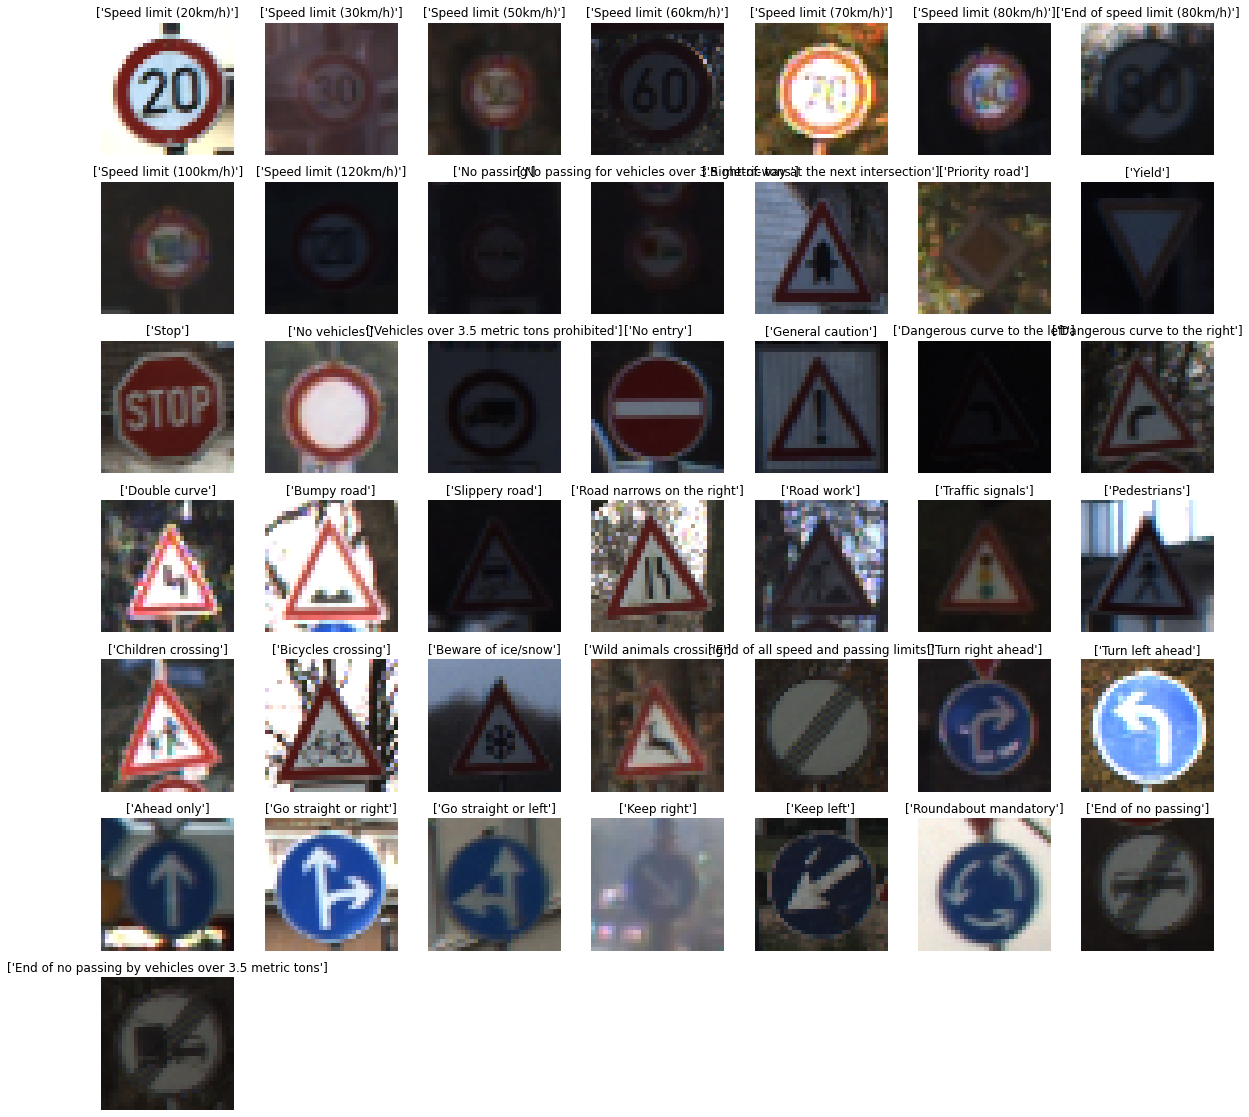

In [ ]:
# Displaying the various traffic signs along with the labels
def display_images_and_labels(images, labels):
    """Display the first image of each label."""
    unique_labels = set(labels)
    plt.figure(figsize=(20, 20))
    i = 1
    for label in unique_labels:
        # Pick the first image for each label.
        image = images[labels.index(label)]
        plt.subplot(7,7, i)  # A grid of 7 rows x 7 columns
        plt.axis('off')
        plt.title(dictionary.get(label))
        i += 1
        _ = plt.imshow(image)
    plt.show()

display_images_and_labels(images, labels)

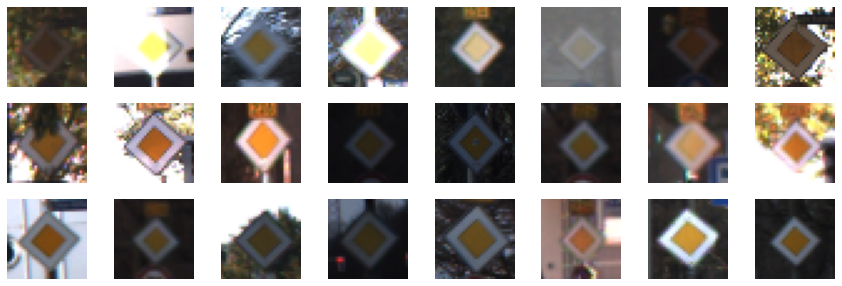

In [ ]:
def display_label_images(images, label):
    """Display images of a specific label."""
    limit = 24  # show a max of 24 images
    plt.figure(figsize=(15, 5))
    i = 1

    start = labels.index(label)
    end = start + labels.count(label)
    for image in images[start:end][:limit]:
        plt.subplot(3, 8, i)  # 3 rows, 8 per row
        plt.axis('off')
        i += 1
        plt.imshow(image)
    plt.show()

display_label_images(images, 12)

In [ ]:
for image in images[:5]:
    print("shape: {0}, min: {1}, max: {2}".format(image.shape, image.min(), image.max()))

shape: (32, 32, 3), min: 10, max: 102
shape: (32, 32, 3), min: 33, max: 148
shape: (32, 32, 3), min: 32, max: 255
shape: (32, 32, 3), min: 8, max: 107
shape: (32, 32, 3), min: 5, max: 158


In [ ]:

print(labels)

[26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26,

In [ ]:
import sklearn.model_selection as ms
import sklearn.preprocessing as p

<BarContainer object of 43 artists>

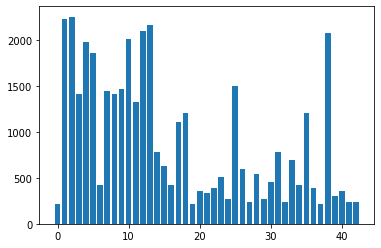

In [ ]:
index, values=np.unique(labels,return_counts=True)
plt.bar(index,values)

In [ ]:
signs=p.LabelEncoder().fit_transform(labels)
len(signs)

39209

In [ ]:
x_train,x_test,y_train,y_test=ms.train_test_split(np.array(images),signs,test_size=0.3,random_state=123)

In [ ]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(27446, 32, 32, 3) (27446,)
(11763, 32, 32, 3) (11763,)


In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_one_hot= to_categorical(y_train)
y_test_one_hot=to_categorical(y_test)

In [ ]:
from tensorflow.keras import applications

In [ ]:
# Initialize model
alexnet = Sequential()

# Layer 1
alexnet.add(Conv2D(96, (11, 11), input_shape=(32,32,3), padding='same'))
alexnet.add(BatchNormalization())
conv1=Activation('relu')
alexnet.add(conv1) 
max_pool_1=MaxPooling2D(pool_size=(2, 2))
alexnet.add(max_pool_1)

# Layer 2
alexnet.add(Conv2D(256, (5, 5), padding='same'))
alexnet.add(BatchNormalization())
conv2=Activation('relu')
alexnet.add(conv2)
max_pool_2=MaxPooling2D(pool_size=(2, 2))
alexnet.add(max_pool_2)

# Layer 3
alexnet.add(ZeroPadding2D((1, 1)))
alexnet.add(Conv2D(512, (3, 3), padding='same'))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 4
alexnet.add(ZeroPadding2D((1, 1)))
alexnet.add(Conv2D(1024, (3, 3), padding='same'))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))

# Layer 5
alexnet.add(ZeroPadding2D((1, 1)))
alexnet.add(Conv2D(1024, (3, 3), padding='same'))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
max_pool_5=MaxPooling2D(pool_size=(2, 2))
alexnet.add(max_pool_5)

# Layer 6
alexnet.add(Flatten())
alexnet.add(Dense(512))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(Dropout(0.5))

# Layer 7
alexnet.add(Dense(512))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(Dropout(0.5))

# Layer 8
alexnet.add(Dense(43))
alexnet.add(BatchNormalization())
alexnet.add(Activation('softmax'))

In [ ]:
alexnet.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

In [ ]:
np.unique(y_train[0:1000], return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 array([ 5, 68, 44, 35, 63, 44, 12, 33, 33, 33, 50, 32, 55, 49, 28, 11, 10,
        32, 26,  6, 14, 18, 14, 12,  6, 30, 17,  7, 18,  6,  7, 24,  5, 12,
        10, 37,  8,  2, 55,  9,  9,  6,  5]))

In [ ]:
history=alexnet.fit(x_train, y_train_one_hot, batch_size=10, epochs=15, validation_split=0.1, shuffle=True)

Epoch 1/15
2471/2471 [==============================] - 121s 35ms/step - loss: 3.3164 - accuracy: 0.1491 - val_loss: 1.3469 - val_accuracy: 0.6029
Epoch 2/15
2471/2471 [==============================] - 88s 36ms/step - loss: 1.4463 - accuracy: 0.6382 - val_loss: 0.4318 - val_accuracy: 0.8874
Epoch 3/15
2471/2471 [==============================] - 88s 36ms/step - loss: 0.7035 - accuracy: 0.8716 - val_loss: 0.1438 - val_accuracy: 0.9658
Epoch 4/15
2471/2471 [==============================] - 88s 35ms/step - loss: 0.3859 - accuracy: 0.9382 - val_loss: 0.0871 - val_accuracy: 0.9781
Epoch 5/15
2471/2471 [==============================] - 88s 35ms/step - loss: 0.2353 - accuracy: 0.9682 - val_loss: 0.0361 - val_accuracy: 0.9891
Epoch 6/15
2471/2471 [==============================] - 87s 35ms/step - loss: 0.1556 - accuracy: 0.9773 - val_loss: 0.1092 - val_accuracy: 0.9727
Epoch 7/15
2471/2471 [==============================] - 87s 35ms/step - loss: 0.1332 - accuracy: 0.9804 - val_loss: 0.0340 

In [ ]:
alexnet.save('/content/drive/MyDrive/DEEP LEARNING/traffic_sign.h5')

Text(0.5, 0, 'epoch')

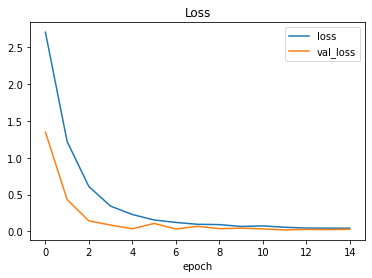

In [ ]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.legend(['loss','val_loss']) 
plt.title('Loss') 
plt.xlabel('epoch') 

Text(0.5, 0, 'epoch')

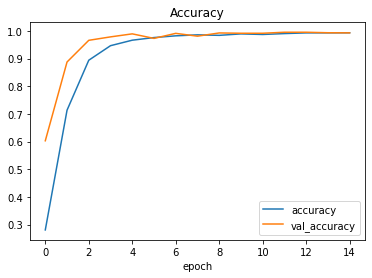

In [ ]:
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy']) 
plt.legend(['accuracy', 'val_accuracy']) 
plt.title('Accuracy') 
plt.xlabel('epoch') 

In [ ]:
score = alexnet.evaluate(x_test, y_test_one_hot, verbose = 0) 
print('Test Loss: ', score[0]) 
print('Test Accuracy: ', score[1]) 

Test Loss:  0.031442586332559586
Test Accuracy:  0.9926038980484009


Predicted sign: [14]
predicted sign: ['Stop']


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


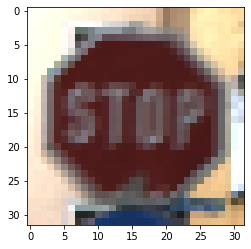

In [ ]:
x=x_test[500]
plt.imshow(x) 
print("Predicted sign: "+ str( 
        alexnet.predict_classes(x.reshape(1, 32, 32, 3)))) 
a=int(alexnet.predict_classes(x.reshape(1, 32, 32, 3)))
print("predicted sign:",dictionary.get(a))

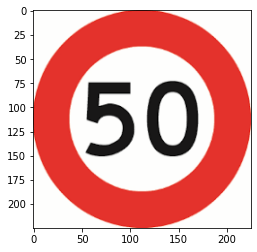

In [ ]:
new_data=cv2.imread('/content/drive/MyDrive/download.png')
new_data = cv2.cvtColor(new_data,cv2.COLOR_BGR2RGB)
plt.imshow(new_data)

In [ ]:
new_data.shape

(225, 225, 3)

In [ ]:
resized = cv2.resize(new_data, (32,32))
resized.shape

(32, 32, 3)

Predicted sign: [2]
predicted sign: ['Speed limit (50km/h)']


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


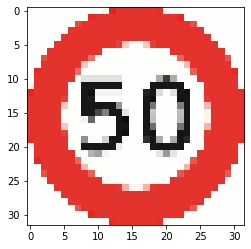

In [ ]:
x=resized
plt.imshow(x) 
print("Predicted sign: "+ str( 
        alexnet.predict_classes(x.reshape(1, 32, 32, 3)))) 
a=int(alexnet.predict_classes(x.reshape(1, 32, 32, 3)))
print("predicted sign:",dictionary.get(a))